<a href="https://colab.research.google.com/github/farazhariyani/PySpark/blob/main/PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Checking files in virtal machine

In [1]:
!ls

sample_data


Install Spark - 
Downloads spark from apache.org Installs spark for the session

In [2]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [26.7 kB]
Hit:12 http://ppa.launchpad.ne

Environment setup

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

Check for spark files in virtual machine

In [4]:
!ls

sample_data  spark-2.3.1-bin-hadoop2.7	spark-2.3.1-bin-hadoop2.7.tgz


In [5]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

#Download Chigago's reported crime data 
"https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2" OR "https://data.cityofchicago.org" Click on Public Safety then Click on Crimes 2001 to Present - Click on Export and Right click on CSV and Copy Link Address

In [6]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2021-07-29 08:55:57--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [        <=>         ]   1.62G  2.30MB/s    in 9m 51s  

2021-07-29 09:05:49 (2.80 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1738705630]



Check all files in virtual machine

In [7]:
!ls

'rows.csv?accessType=DOWNLOAD'	 spark-2.3.1-bin-hadoop2.7
 sample_data			 spark-2.3.1-bin-hadoop2.7.tgz


Rename file for better access

In [8]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv

Check if file downloaded correctly.
We can see the first 5 rows of the csv file.

In [9]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

#API
## DataFrames 
 High level API, Immutable
## Resilient Distributed Datasets(RDDs)
 Low level API

##Dataframe
**Reading CSV file**
df = spark.read.csv(filepath, header=)

**View first few rows**

*   df.take(n) - return list of row objects
*   df.collect() - return all data from dataframe. If dataset is large, it can crash the driver node
*   df.show(n) - return data in a nice format
*   df.limit(n) - returns a new dataframe, by taking the first 'n' rows. Calls collect() on the limit()
*   df.head(n) - returns the take()

**Schemas**
*   df.dtypes
*   df.printSchema()

Import different data types from pyspark.sql.types

In [10]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [11]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, DoubleType, IntegerType

In [12]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

##Two ways to add schema to DataFrame

**1st**
schema = StructType([
            StructField('ID', StringType, True),#columnname, datatype, Null-Value
            StructField('Case Number', StringType, True),
            StructField('Date', TimestampType, True),
            StructField('Block', StringType, True),
            StructField('IUCR', StringType, True),
            StructField('Primary Type', StringType, True),
            StructField('Description', StringType, True),
            StructField('Location Description', StringType, True),
            StructField('Arrest', StringType, True),
            StructField('Domestic', BooleanType, True),
            StructField('Beat', StringType, True),
            StructField('District', StringType, True),
            StructField('Ward', StringType, True),
            StructField('Community Area', StringType, True),
            StructField('FBI Code', StringType, True),
            StructField('X Coordinate', StringType, True),
            StructField('Y Coordinate', StringType, True),
            StructField('Year', IntegerType, True),
            StructField('Updated On', TimestampType, True),
            StructField('Latitude', DoubleType, True),
            StructField('Longitude', DoubleType, True),
            StructField('Location' StringType, True)
])

**2nd**

In [13]:
labels = [
        ('ID', StringType()),
        ('Case Number', StringType()),
        ('Date', TimestampType()),
        ('Block', StringType()),
        ('IUCR', StringType()),
        ('Primary Type', StringType()),
        ('Description', StringType()),
        ('Location Description', StringType()),
        ('Arrest', StringType()),
        ('Domestic', BooleanType()),
        ('Beat', StringType()),
        ('District', StringType()),
        ('Ward', StringType()),
        ('Community Area', StringType()),
        ('FBI Code', StringType()),
        ('X Coordinate', StringType()),
        ('Y Coordinate', StringType()),
        ('Year', IntegerType()),
        ('Updated On', TimestampType()),
        ('Latitude', DoubleType()),
        ('Longitude', DoubleType()),
        ('Location', StringType())]

Schema is made up of multiple StructType and StructField. Using list comprehension, taking 1st and 2nd element of the list and making them all TRUE for null values

In [14]:
schema = StructType([StructField (x[0], x[1], True) for x in labels])
schema

StructType(List(StructField(ID,StringType,true),StructField(Case Number,StringType,true),StructField(Date,TimestampType,true),StructField(Block,StringType,true),StructField(IUCR,StringType,true),StructField(Primary Type,StringType,true),StructField(Description,StringType,true),StructField(Location Description,StringType,true),StructField(Arrest,StringType,true),StructField(Domestic,BooleanType,true),StructField(Beat,StringType,true),StructField(District,StringType,true),StructField(Ward,StringType,true),StructField(Community Area,StringType,true),StructField(FBI Code,StringType,true),StructField(X Coordinate,StringType,true),StructField(Y Coordinate,StringType,true),StructField(Year,IntegerType,true),StructField(Updated On,TimestampType,true),StructField(Latitude,DoubleType,true),StructField(Longitude,DoubleType,true),StructField(Location,StringType,true)))

In [15]:
!ls

reported-crimes.csv  spark-2.3.1-bin-hadoop2.7	    spark-warehouse
sample_data	     spark-2.3.1-bin-hadoop2.7.tgz


In [16]:
#rc = spark.read.csv('reported-crimes.csv', header = True, schema = schema)
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



Values in the dataset do not match with the datatypes mentioned in the schema

In [17]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

##Access a column
*   df.column1
*   df['column1'] - indexing
*   df.select(col('column1'))
*   df.column - get column names
*   df.select('column1','column2').show(3) - select multiple columns
*   df.withColumn('DoubleColumn',2*df['AColumn']) - add a new column with values twice as large as existing column
*   df.withColumnRenamed(ExistingColumnName, NewColumnName) - rename a cloumn, returns a new dataframe
*   df.drop('Column') OR df.drop('column1','column2', 'column3') - drop columns
*   df.groupby('column') - useful to run aggregate functions e.g. COUNT, SUM..
















**Display first 5 rows of column IUCR**

In [18]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



In [19]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



**Display only the first 4 rows of the column names CasE Number, Date and Arrest**

In [20]:
rc.select('Case Number', 'Date', 'Arrest').show(4)

+-----------+-------------------+------+
|Case Number|               Date|Arrest|
+-----------+-------------------+------+
|   HY411648|2015-09-05 13:30:00| false|
|   HY411615|2015-09-04 11:30:00| false|
|   JC213529|2018-09-01 00:01:00| false|
|   HY411595|2015-09-05 12:45:00|  true|
+-----------+-------------------+------+
only showing top 4 rows



**Add a column with name One, with all entries as 1s**

In [21]:
from pyspark.sql.functions import lit

In [22]:
rc.withColumn('One', lit(1)).show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|

**Remove column IUCR**

In [23]:
rc = rc.drop('IUCR')
rc.show(5)

+--------+-----------+-------------------+--------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            6

##Access rows

*   df.filter(col('columnName' > 1) - filtering rows in pyspark
*   df.select(columnNames).distinct().show() - displaying unique rows
*   df.orderBy(col('columnName')) - sort rows
*   df.union(df2) - combines 2 datasets. Both datasets should have same number of colums and same schema.





**Add reported crimes for an additional day, 12-Nov-2018 to our dataset**

In [24]:
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))

In [25]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one_day.count()

3

In [26]:
rc.union(one_day).show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [27]:
result = rc.union(one_day).orderBy('Date', ascending = False)
result.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11516594|   JB528186|2018-11-12 00:00:00| 049XX S PRAIRIE AVE|2826|      OTHER OFFENSE|HARASSMENT BY ELE...|               OTHER|

**Top 10 number of reported crimes by Primary type, in descending order of occurence**

In [28]:
result = rc.groupBy('Primary Type').count()
result.show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|OFFENSE INVOLVING...|  46165|
|CRIMINAL SEXUAL A...|    861|
|            STALKING|   3384|
|PUBLIC PEACE VIOL...|  47785|
|           OBSCENITY|    584|
|NON-CRIMINAL (SUB...|      9|
|               ARSON|  11156|
|   DOMESTIC VIOLENCE|      1|
|            GAMBLING|  14422|
|   CRIMINAL TRESPASS| 193371|
|             ASSAULT| 418512|
|      NON - CRIMINAL|     38|
|LIQUOR LAW VIOLATION|  14068|
| MOTOR VEHICLE THEFT| 314131|
|               THEFT|1418456|
|             BATTERY|1232246|
|             ROBBERY| 255598|
|            HOMICIDE|   9467|
|           RITUALISM|     23|
|    PUBLIC INDECENCY|    161|
+--------------------+-------+
only showing top 20 rows



After groupBy(), there should be an aggregation function, here we are using count()

In [29]:
result = rc.groupBy('Primary Type').count().orderBy('count', ascending = False)
result.show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1418456|
|            BATTERY|1232246|
|    CRIMINAL DAMAGE| 771501|
|          NARCOTICS| 711748|
|      OTHER OFFENSE| 418875|
|            ASSAULT| 418512|
|           BURGLARY| 388037|
|MOTOR VEHICLE THEFT| 314131|
| DECEPTIVE PRACTICE| 266418|
|            ROBBERY| 255598|
+-------------------+-------+
only showing top 10 rows



**Find the percentage of reported crimes that resulted in an arrest**

In [30]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [31]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [32]:
percentage = rc.filter(col('Arrest') == 'true').count()/ rc.select('Arrest').count()
print(percentage*100,'%')

27.754724785868234 %


**Find the top 3 locations for reported crime**

In [33]:
rc.groupby('Location Description').count().show()

+--------------------+------+
|Location Description| count|
+--------------------+------+
|   RAILROAD PROPERTY|    13|
|SCHOOL - PRIVATE ...|     7|
|AIRPORT TERMINAL ...|  1603|
|EXPRESSWAY EMBANK...|     1|
|VEHICLE - COMMERCIAL|     7|
|POLICE FACILITY/V...| 17604|
|RESIDENCE - YARD ...|    63|
|               MOTEL|     5|
|CHA PARKING LOT /...|     8|
|            SIDEWALK|665557|
|AIRPORT TERMINAL ...|    77|
|PUBLIC GRAMMAR SC...|     1|
|OTHER RAILROAD PR...|     5|
|CTA GARAGE / OTHE...|  9937|
|            CAR WASH|  2775|
|   TRUCKING TERMINAL|     1|
|    AIRPORT/AIRCRAFT| 16114|
|            HOSPITAL|     5|
|MEDICAL/DENTAL OF...|  7097|
|    FEDERAL BUILDING|   783|
+--------------------+------+
only showing top 20 rows



In [34]:
rc.groupby('Location Description').count().orderBy('count', ascending = False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770586|
|           RESIDENCE|1145369|
|           APARTMENT| 698573|
+--------------------+-------+
only showing top 3 rows



##Built-in Functions

*   Built-in functions are available - from pyspark.sql import functions 
*   from pyspark.sql.functions import mean
df.select(mean(df.column1)).show()
*   print(dir(functions)
*   List item





In [35]:
from pyspark.sql import functions

In [36]:
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

**String functions**

Display the Primary type column in lower and upper characters, and the first 4 characters of the column

In [37]:
from pyspark.sql.functions import lower, upper, substring

In [38]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. note:: The position is not zero based, but 1 based index.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]
    
    .. versionadded:: 1.5



In [39]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [40]:
rc.select(lower(col('Primary Type')),upper(col('Primary Type')), substring(col('Primary Type'),1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|              theft|              THEFT|                         THEF|
|          narcotics|          NARCOTICS|                         NARC|
|            assault|            ASSAULT|                         ASSA|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



**Numeric functions**

Show the oldest date and the most recent date

In [41]:
from pyspark.sql.functions import min, max

In [42]:
rc.select(min(col('Date')), max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-10 23:55:00|
+-------------------+-------------------+



**Date**

What is 3 days earlier than the oldest date and 3 days later than the most recent date? 

In [43]:
from pyspark.sql.functions import date_add, date_sub

In [44]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start, days)
    Returns the date that is `days` days after `start`
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]
    
    .. versionadded:: 1.5



In [45]:
help(date_sub)

Help on function date_sub in module pyspark.sql.functions:

date_sub(start, days)
    Returns the date that is `days` days before `start`
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_sub(df.dt, 1).alias('prev_date')).collect()
    [Row(prev_date=datetime.date(2015, 4, 7))]
    
    .. versionadded:: 1.5



In [46]:
rc.select(date_sub(min(col('Date')),3),date_add(max(col('Date')),3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-13|
+----------------------+----------------------+



**Date functions**

*   to_date
*   to_timestamp



Addressing different date representations using pyspark

In [47]:
from pyspark.sql.functions import to_date, to_timestamp, lit

2019-12-25 13:30:00

In [48]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)],['Chirstmas']) ## Christmas is the column name
df.show(1)

+-------------------+
|          Chirstmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



Refer for date presentation format to check which letters to use "https://docs.oracle.com/javase/8/docs/api/java/text/SimpleDateFormat.html"

In [49]:
df.select(to_date(col('Chirstmas'),'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Chirstmas'),'yyyy-MM-dd HH:mm:ss')).show(1)

+-------------------------------------------+------------------------------------------------+
|to_date(`Chirstmas`, 'yyyy-MM-dd HH:mm:ss')|to_timestamp(`Chirstmas`, 'yyyy-MM-dd HH:mm:ss')|
+-------------------------------------------+------------------------------------------------+
|                                 2019-12-25|                             2019-12-25 13:30:00|
+-------------------------------------------+------------------------------------------------+



25/Dec/2019 13:30:00

In [50]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Chirstmas'])
df.show(1)

+--------------------+
|           Chirstmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [51]:
df.select(to_date(col('Chirstmas'),'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Chirstmas'),'dd/MMM/yyyy HH:mm:ss')).show(1)

+--------------------------------------------+-------------------------------------------------+
|to_date(`Chirstmas`, 'dd/MMM/yyyy HH:mm:ss')|to_timestamp(`Chirstmas`, 'dd/MMM/yyyy HH:mm:ss')|
+--------------------------------------------+-------------------------------------------------+
|                                  2019-12-25|                              2019-12-25 13:30:00|
+--------------------------------------------+-------------------------------------------------+



12/25/2019 01:30:00 PM

In [52]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)],['Chirstmas'])
df.show(1)

+--------------------+
|           Chirstmas|
+--------------------+
|12/25/2019 01:30:...|
+--------------------+



In [53]:
df.show(1, truncate = False)

+----------------------+
|Chirstmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [54]:
df.select(to_date(col('Chirstmas'),'mm/dd/yyyy hh:mm:ss aa'), to_timestamp(col('Chirstmas'),'mm/dd/yyyy hh:mm:ss aa')).show(1)

+----------------------------------------------+---------------------------------------------------+
|to_date(`Chirstmas`, 'mm/dd/yyyy hh:mm:ss aa')|to_timestamp(`Chirstmas`, 'mm/dd/yyyy hh:mm:ss aa')|
+----------------------------------------------+---------------------------------------------------+
|                                    2019-01-25|                                2019-01-25 13:30:00|
+----------------------------------------------+---------------------------------------------------+



In [55]:
nrc = spark.read.csv('reported-crimes.csv',header=True)
nrc.show(5)

+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|   

In [56]:
nrc.show(5, truncate = False)

+--------+-----------+----------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date                  |Block                |IUCR|Primary Type|Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+----------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|10224738|HY411648   |09/05/2015 01:30:00 PM|043XX S WOOD ST      |0486|BATTERY     |DOMESTIC BAT

##Join
*   Brings two sets of data together
*   Inner Join - Keeps rows that exists in both datasets
*   Outer Join - keeps rows with keys in their dataset
*   Left outer Join - keeps rows with keys in the left dataset
*   Right outer Join - keeps rows with keys in the right dataset

*   df.join(df2, df.column == df2.column, how = {'inner'})


##Download Poilice Station dataset
https://data.cityofchicago.org/Public-Safety/Police-Stations/z8bn-74gv OR "https://data.cityofchicago.org" Click on Public Safety then Click on Police Station - Click on Export and Right click on CSV and Copy Link Address

In [57]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2021-07-29 09:20:09--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2021-07-29 09:20:09 (570 MB/s) - ‘police-station.csv’ saved [5699]



In [58]:
!ls

police-station.csv   sample_data		spark-2.3.1-bin-hadoop2.7.tgz
reported-crimes.csv  spark-2.3.1-bin-hadoop2.7	spark-warehouse


In [59]:
ps = spark.read.csv('police-station.csv',header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

**Reported crime dataset has only the district number. Add the district name by joining with the police station dataset.**

Cache reported crime dataset to spped the process, and run a comand as cache is laserly evaluated.

In [60]:
rc.cache()
rc.count()

6754486

In [61]:
ps.select(col('District')).distinct().show(30)

+--------------------+
|            District|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [62]:
rc.select(col('district')).distinct().show(30)

+--------+
|district|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     021|
|     002|
+--------+



District numbers from Reported crimes dataset have leading zero's(0), and Police Station dataset dose not have zero's.

We need to do padding to fix this

In [63]:
from pyspark.sql.functions import lpad

In [64]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]
    
    .. versionadded:: 1.5



Padding district numbers in the police station dataset

In [65]:
ps.select(lpad(col('DISTRICT'),3,'0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [66]:
ps = ps.withColumn('Format_District', lpad(col('DISTRICT'),3,'0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_District|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

If I want to do a lookup for each of the districts in the reported crime dataset, then I want to make sure that atleast, all of the entries in the reported crime data frame are there. So this means I want to use a left outer join.

In [67]:
rc.join(ps, rc.District == ps.Format_District, 'left_outer').show()

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_Distri

Drop unnecessary columns

In [68]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_District']

In [69]:
rc.join(ps, rc.District == ps.Format_District, 'left_outer').drop('ADDRESS', 'CITY', 'STATE', 'ZIP', 'WEBSITE', 'PHONE', 'FAX', 'TTY', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION').show()

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|Format_District|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+---------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|2015|02/10/2018 03:50:...|       9|       Deeri

**Find the most frequently reported noncriminal activity**

In [70]:
rc.cache()
rc.count()

6754486

In [71]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [72]:
rc.select(col('Primary Type')).distinct().count()

36

In [73]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(36, truncate = False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [74]:
nc = rc.filter((col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.show(50, truncate=False)

+--------+-----------+-------------------+-----------------------+----+--------------------------------+-------------------------------------------+----------------------------------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date               |Block                  |IUCR|Primary Type                    |Description                                |Location Description                          |Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+-------------------+-----------------------+----+--------------------------------+-------------------------------------------+----------------------------------------------+------+--------+----+--------+----+--------------+--------+------------+-

In [75]:
nc.groupBy(col('Description')).count().orderBy('count', ascending = False).show(truncate = False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



**Find the day of the week with the most reported crime**

In [76]:
from pyspark.sql.functions import dayofweek

In [77]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]
    
    .. versionadded:: 2.3



In [78]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [79]:
rc.select(col('Date'), dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2015-09-05 13:30:00|              7|
|2015-09-04 11:30:00|              6|
|2018-09-01 00:01:00|              7|
|2015-09-05 12:45:00|              7|
|2015-09-05 13:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [80]:
from pyspark.sql.functions import date_format

In [81]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of the Java class `java.text.SimpleDateFormat` can be used.
    
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [82]:
rc.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'), 'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
|2015-09-05 12:45:00|              7|                 Sat|
|2015-09-05 13:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [83]:
rc.groupBy(date_format(col('Date'), 'E')).count().show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Sun| 912108|
|                 Mon| 952907|
|                 Thu| 964745|
|                 Sat| 965330|
|                 Wed| 974054|
|                 Fri|1017142|
|                 Tue| 968200|
+--------------------+-------+



In [84]:
rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count', ascending = False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017142|
|                 Wed| 974054|
|                 Tue| 968200|
|                 Sat| 965330|
|                 Thu| 964745|
|                 Mon| 952907|
|                 Sun| 912108|
+--------------------+-------+



To Plot

In [85]:
rc.groupBy(date_format(col('Date'), 'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912108),
 Row(date_format(Date, E)='Mon', count=952907),
 Row(date_format(Date, E)='Thu', count=964745),
 Row(date_format(Date, E)='Sat', count=965330),
 Row(date_format(Date, E)='Wed', count=974054),
 Row(date_format(Date, E)='Fri', count=1017142),
 Row(date_format(Date, E)='Tue', count=968200)]

In [86]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [87]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
cnt

[912108, 952907, 964745, 965330, 974054, 1017142, 968200]

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
cp = pd.DataFrame({'Day_of_Week': dow, 'Count': cnt})
cp.head(7)

,Day_of_Week,Count
0,Sun,912108
1,Mon,952907
2,Thu,964745
3,Sat,965330
4,Wed,974054
5,Fri,1017142
6,Tue,968200


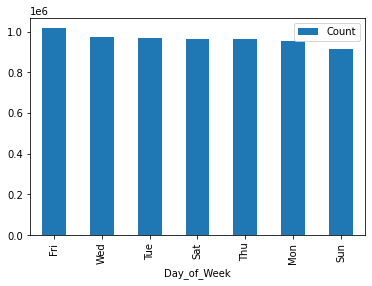

In [90]:
cp.sort_values('Count', ascending= False).plot(kind = 'bar', x = 'Day_of_Week', y = 'Count')

Text(0.5, 1.0, 'Number of reported crimes per Day of the week from 2001 to present')

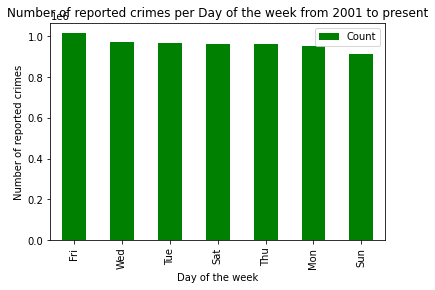

In [91]:
cp.sort_values('Count', ascending= False).plot(kind = 'bar', color = 'green', x = 'Day_of_Week', y = 'Count')
plt.xlabel('Day of the week')
plt.ylabel('Number of reported crimes')
plt.title('Number of reported crimes per Day of the week from 2001 to present')

#RDD - Resilient Distributed Datasets

*   Immutable partitioned collection of records that can be worked on in parallel.
*   Records are just Java, Scala, or Python objects, and we have complete control over them.
*   Does not understand inner stucture of records
*   Use RDD for control over the physical distribution and partitioning of data
*   When maintaing a legacy codebase written using RDDs
*   https://databricks.com/blog/2015/02/17/introducing-dataframes-in-spark-for-large-scale-data-science.html 








**RDD Setup**

Open file using sc.textfile

In [92]:
psrdd = sc.textFile('police-station.csv')
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [93]:
ps_header = psrdd.first()

In [94]:
ps_rest = psrdd.filter(lambda line: line!= ps_header)
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

**How many police stations are there**

In [95]:
ps_rest.map(lambda line: line.split(',')).collect()

[['Headquarters',
  'Headquarters',
  '3510 S Michigan Ave',
  'Chicago',
  'IL',
  '60653',
  'http://home.chicagopolice.org',
  '',
  '',
  '',
  '1177731.401',
  '1881697.404',
  '41.83070169',
  '-87.62339535',
  '"(41.8307016873',
  ' -87.6233953459)"'],
 ['18',
  'Near North',
  '1160 N Larrabee St',
  'Chicago',
  'IL',
  '60610',
  'http://home.chicagopolice.org/community/districts/18th-district-near-north/',
  '312-742-5870',
  '312-742-5771',
  '312-742-5773',
  '1172080.029',
  '1908086.527',
  '41.90324165',
  '-87.64335214',
  '"(41.9032416531',
  ' -87.6433521393)"'],
 ['19',
  'Town Hall',
  '850 W Addison St',
  'Chicago',
  'IL',
  '60613',
  'http://home.chicagopolice.org/community/districts/19th-district-town-hall/',
  '312-744-8320',
  '312-744-4481',
  '312-744-8011',
  '1169730.744',
  '1924160.317',
  '41.94740046',
  '-87.65151202',
  '"(41.9474004564',
  ' -87.651512018)"'],
 ['20',
  'Lincoln',
  '5400 N Lincoln Ave',
  'Chicago',
  'IL',
  '60625',
  'http://

In [96]:
ps_rest.map(lambda line: line.split(',')).count()

24

**Display the District ID, District Name, Address, Zip for the police station with District ID 7**

In [97]:
(ps_rest.filter(lambda line: line.split(',')[0] == '7').
map(lambda line: (line.split(',')[0],
                  line.split(',')[1],
                  line.split(',')[2],
                  line.split(',')[5],
                  )).collect())

[('7', 'Englewood', '1438 W 63rd St', '60636')]

**Police stations 10 and 11 are geographically close to each other. Display the District ID, District Name, Address, Zip code**

In [98]:
(ps_rest.filter(lambda line: line.split(',')[0] in ['10', '11']).
map(lambda line: (line.split(',')[0],
    line.split(',')[1],
    line.split(',')[2],
    line.split(',')[5])).collect())

[('10', 'Ogden', '3315 W Ogden Ave', '60623'),
 ('11', 'Harrison', '3151 W Harrison St', '60612')]